In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime

In [45]:
# Load the data
df = pd.read_csv("./NYPD_Arrest_Data__Year_to_Date__20250710.csv")

In [46]:
# Parse dates and clean coordinates
df["ARREST_DATE"] = pd.to_datetime(df["ARREST_DATE"], errors="coerce")
df = df[df["Latitude"] != 0]  # Remove invalid geo-points

In [47]:
# Select relevant columns
cols = [
    "ARREST_DATE",
    "LAW_CAT_CD",
    "PERP_SEX",
    "PERP_RACE",
    "AGE_GROUP",
    "ARREST_BORO",
    "Latitude",
    "Longitude",
]
df = df[cols].dropna()

# Attribute 1: LAW_CAT_CD

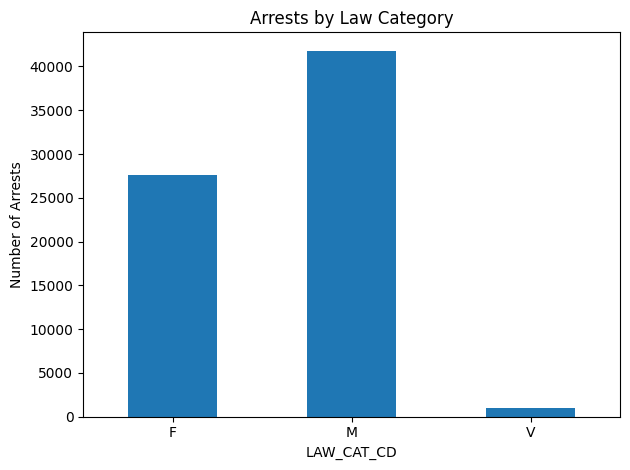

In [48]:
# Summary of law categories
df = df[df["LAW_CAT_CD"].isin(["F", "M", "V"])]
law_counts = df["LAW_CAT_CD"].value_counts().sort_index()
law_counts.plot(kind="bar", title="Arrests by Law Category", ylabel="Number of Arrests")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Explanation:
- "F": Felony, "M": Misdemeanor, "V": Violation
- Majority of arrests fall under misdemeanors, indicating police are more frequently detaining people for less severe infractions.
- This attribute tells us about the **legal classification** of offenses, but not whether charges were upheld, or the context of the arrest.

# Attribute 2: PERP_RACE by LAW_CAT_CD

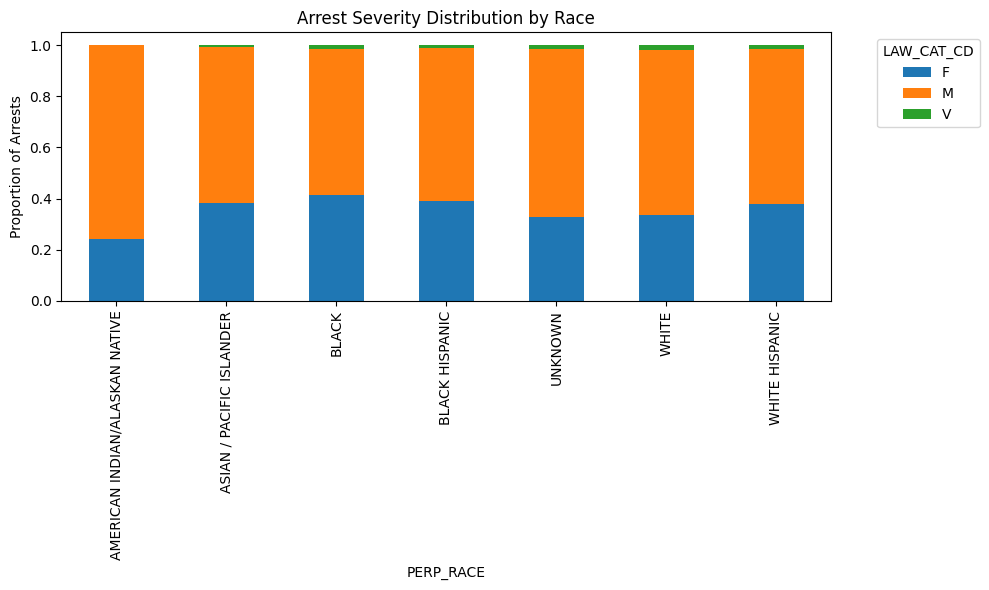

In [49]:
race_law = pd.crosstab(df["PERP_RACE"], df["LAW_CAT_CD"], normalize="index")
fig, ax = plt.subplots(figsize=(10, 6))
race_law.plot(kind="bar", stacked=True, ax=ax)
ax.set_title("Arrest Severity Distribution by Race")
ax.set_ylabel("Proportion of Arrests")
ax.legend(title="LAW_CAT_CD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Explanation:
- Helps assess if certain racial groups are disproportionately arrested for more serious crimes.
- However, it cannot show **why** differences exist — not accounting for population base rates, precinct policies, or structural bias.

# Attribute 3: AGE_GROUP vs LAW_CAT_CD

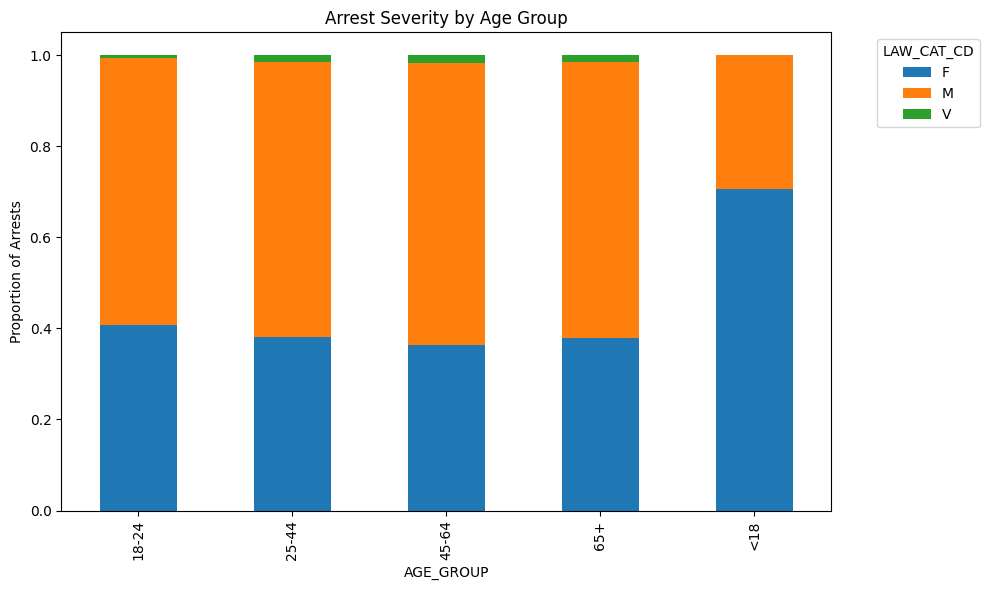

In [50]:
age_law = pd.crosstab(df["AGE_GROUP"], df["LAW_CAT_CD"], normalize="index")
fig, ax = plt.subplots(figsize=(10, 6))
age_law.plot(kind="bar", stacked=True, ax=ax)
ax.set_title("Arrest Severity by Age Group")
ax.set_ylabel("Proportion of Arrests")
ax.legend(title="LAW_CAT_CD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Explanation:
- Youth (18–24) and adults (25–44) face most felony and misdemeanor charges.
- The attribute gives demographic trends, but cannot tell us **intent**, **recidivism**, or **policing focus**.

# Attribute 4: Map of Arrests by Borough

In [51]:
import folium
from folium.plugins import MarkerCluster

In [52]:
# Centered on NYC
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
marker_cluster = MarkerCluster().add_to(map_nyc)

In [53]:
# Sample for performance
for idx, row in df.sample(1000).iterrows():
    folium.CircleMarker(
        location=(row["Latitude"], row["Longitude"]),
        radius=2,
        color="blue",
        fill=True,
        fill_opacity=0.5,
        popup=f"{row['LAW_CAT_CD']} - {row['PERP_RACE']}",
    ).add_to(marker_cluster)

In [54]:
from IPython.display import display

In [55]:
display(map_nyc)

Explanation:
- Map helps visualize **where** arrests cluster, especially in certain boroughs.
- But arrest location does not mean **crime location**, and map density may reflect precinct size more than crime rate.

Final Notes
- Attributes like LAW_CAT_CD give insight into severity, but don't convey outcome or fairness.
- Demographics show who is getting arrested, but not necessarily who is committing crimes — deeper systemic and contextual data is needed.
- Visualizations are tools to explore *correlations*, not determine *causality*.

In [56]:
# Save map
map_nyc.save("./arrest_map.html")